___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [5]:
df.corr()['target']

age        -0.225
sex        -0.281
cp          0.434
trestbps   -0.145
chol       -0.085
fbs        -0.028
restecg     0.137
thalach     0.422
exang      -0.437
oldpeak    -0.431
slope       0.346
ca         -0.392
thal       -0.344
target      1.000
Name: target, dtype: float64

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

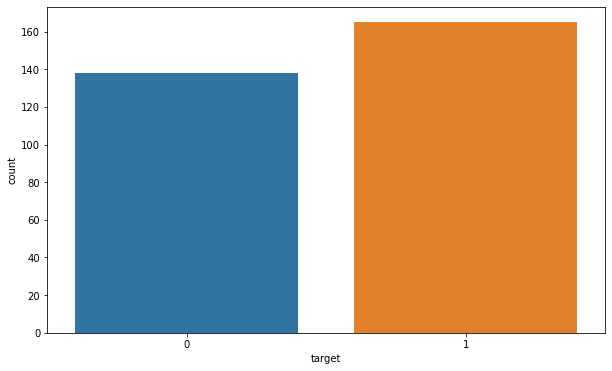

In [7]:
sns.countplot(df.target)

# Data Preprocessing

<AxesSubplot:xlabel='age'>

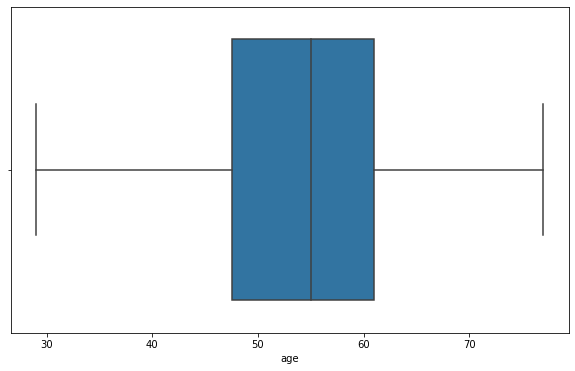

In [8]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='cp'>

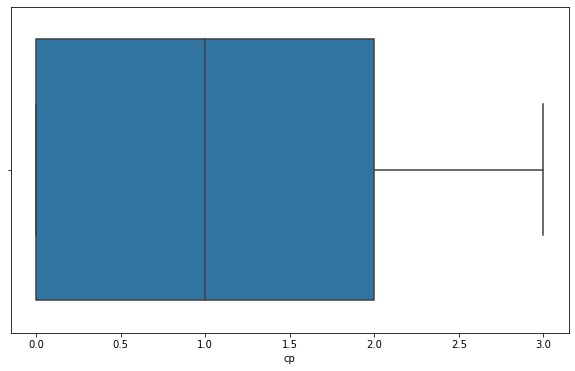

In [9]:
sns.boxplot(df.cp)

<AxesSubplot:xlabel='trestbps'>

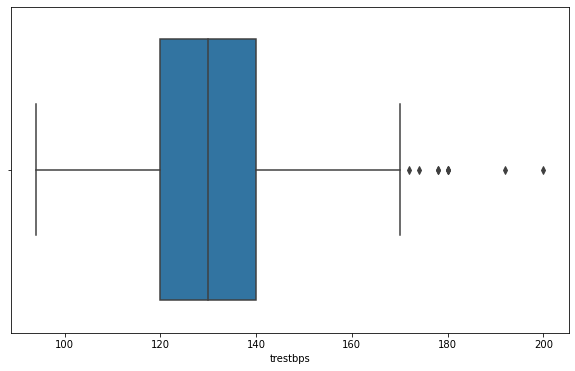

In [10]:
sns.boxplot(df.trestbps)

<AxesSubplot:xlabel='chol'>

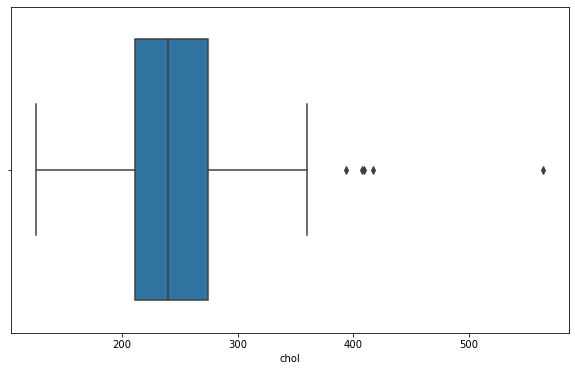

In [11]:
sns.boxplot(df.chol)

In [12]:
df=df[df.chol<425]

<AxesSubplot:xlabel='chol'>

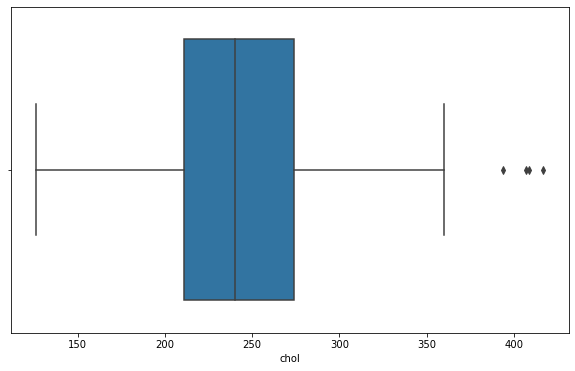

In [13]:
sns.boxplot(df.chol)

<AxesSubplot:xlabel='restecg'>

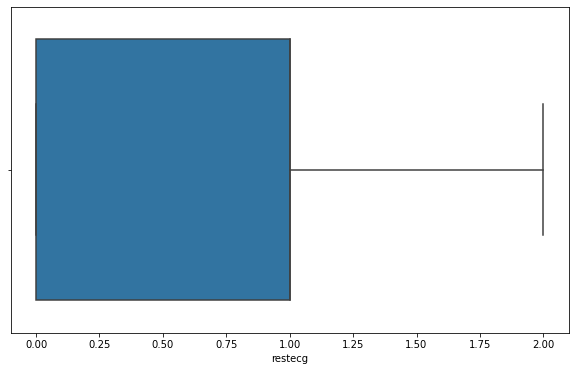

In [14]:
sns.boxplot(df.restecg)

<AxesSubplot:xlabel='thalach'>

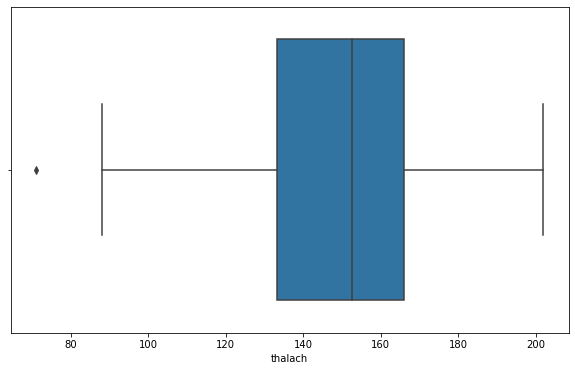

In [15]:
sns.boxplot(df.thalach)

In [16]:
df=df[df.thalach>80]

<AxesSubplot:xlabel='thalach'>

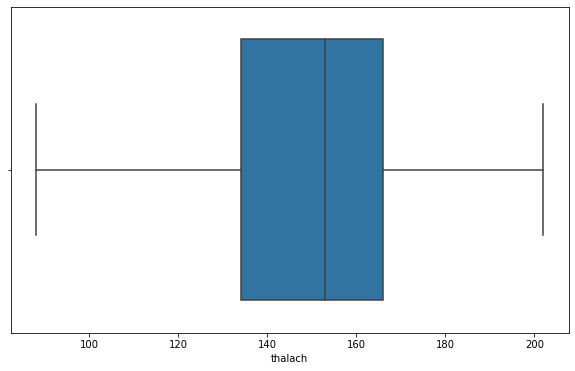

In [17]:
sns.boxplot(df.thalach)

<AxesSubplot:xlabel='oldpeak'>

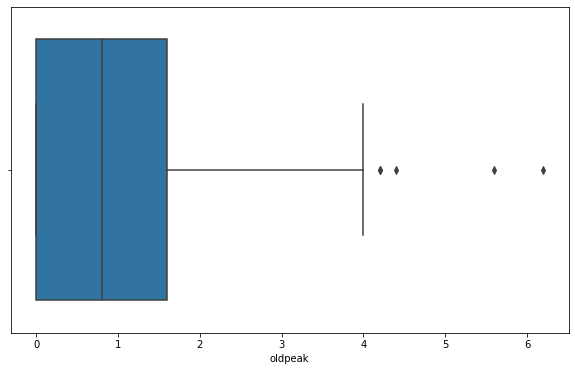

In [18]:
sns.boxplot(df.oldpeak)

<AxesSubplot:xlabel='slope'>

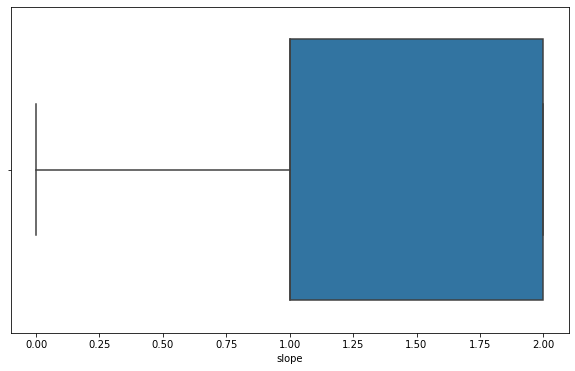

In [19]:
sns.boxplot(df.slope)

<AxesSubplot:xlabel='ca'>

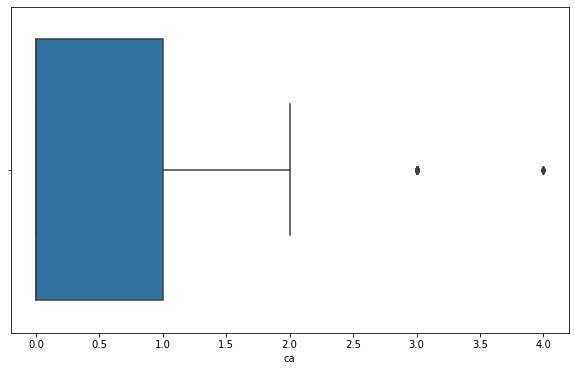

In [20]:
sns.boxplot(df.ca)

In [21]:
df.ca.value_counts()

0    173
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [22]:
df=df[df.ca<4]

<AxesSubplot:xlabel='ca'>

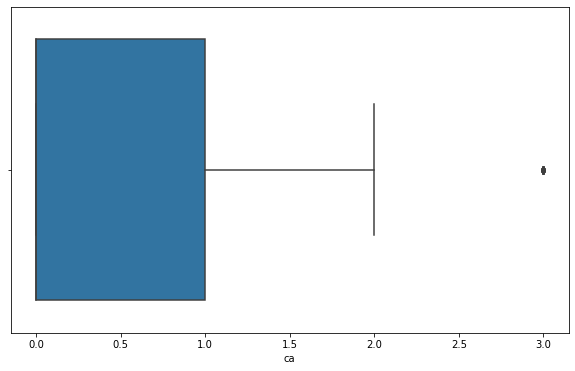

In [23]:
sns.boxplot(df.ca)

<AxesSubplot:xlabel='thal'>

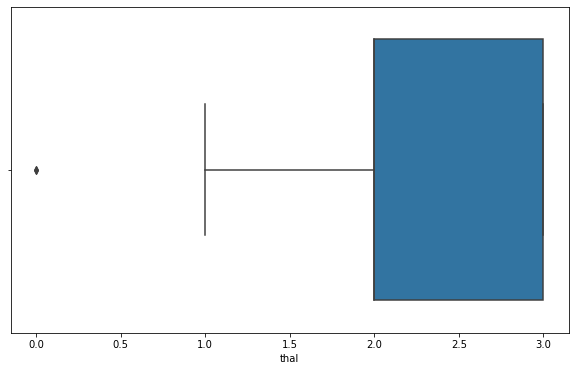

In [24]:
sns.boxplot(df.thal)

In [25]:
df=df[df.thal>0]

<AxesSubplot:xlabel='thal'>

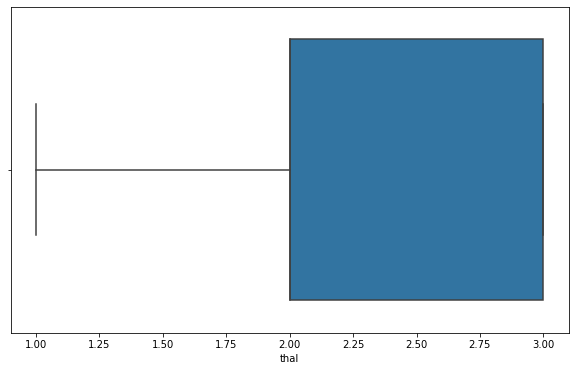

In [26]:
sns.boxplot(df.thal)

In [27]:
df.shape

(294, 14)

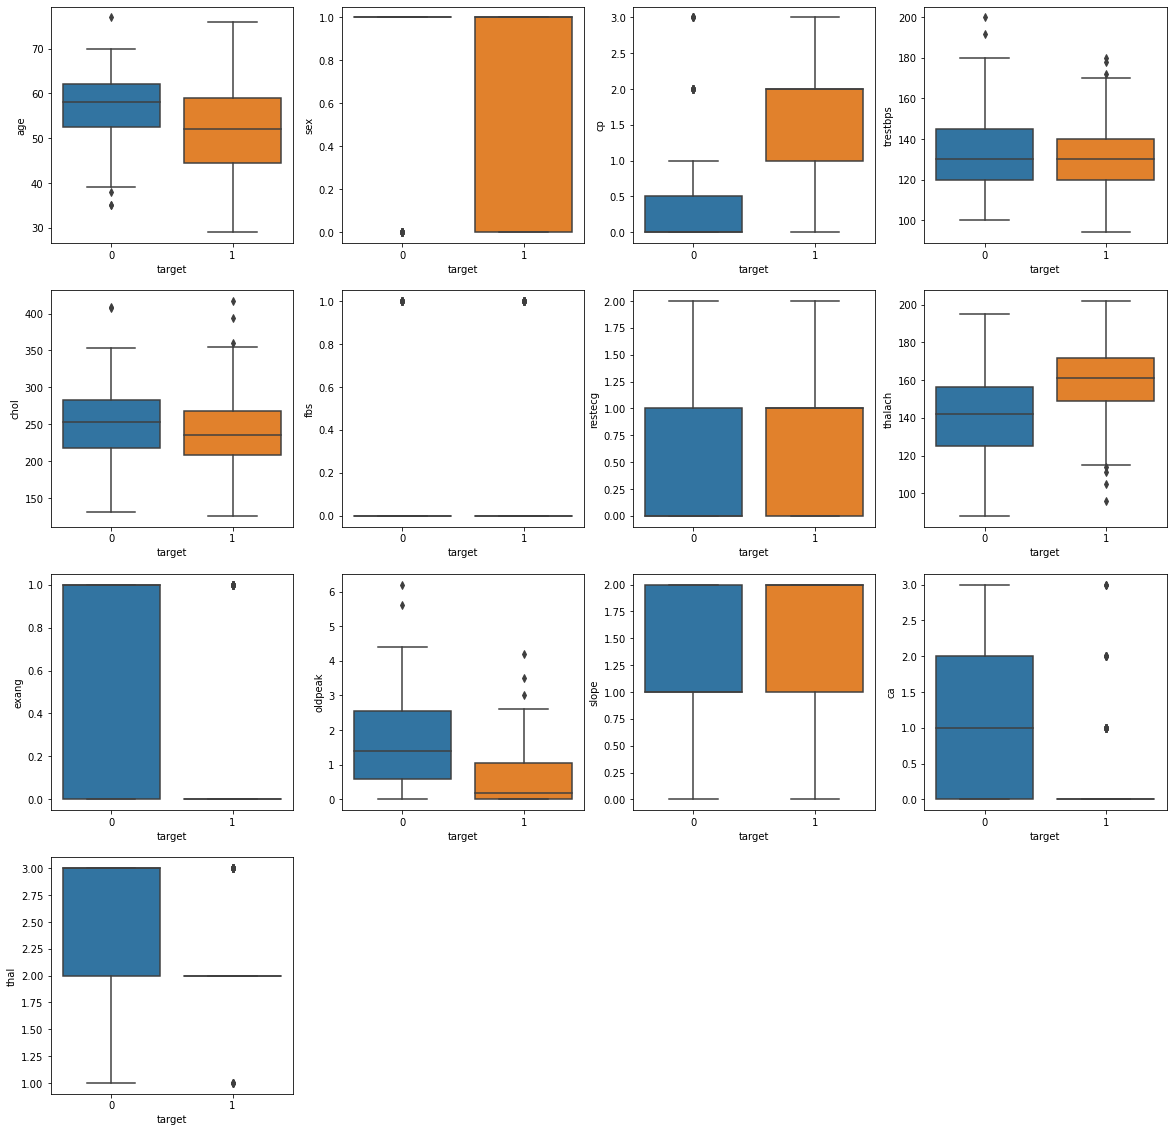

In [28]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='target',y=feature,data=df)

<AxesSubplot:>

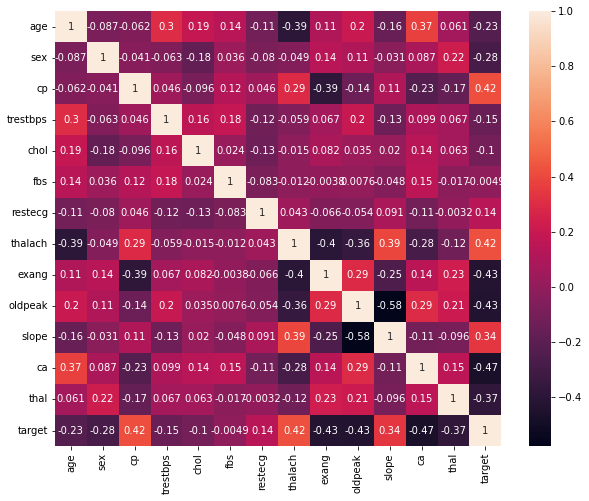

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

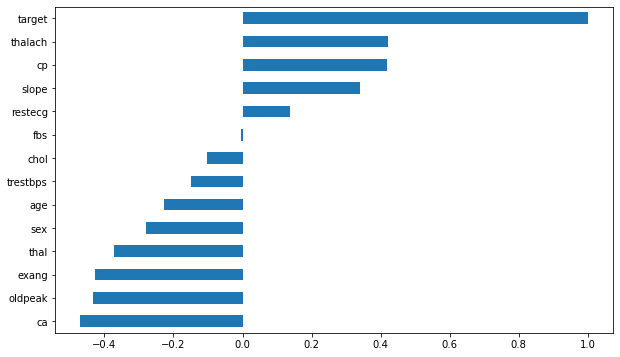

In [30]:
df.corr()["target"].sort_values().plot.barh()

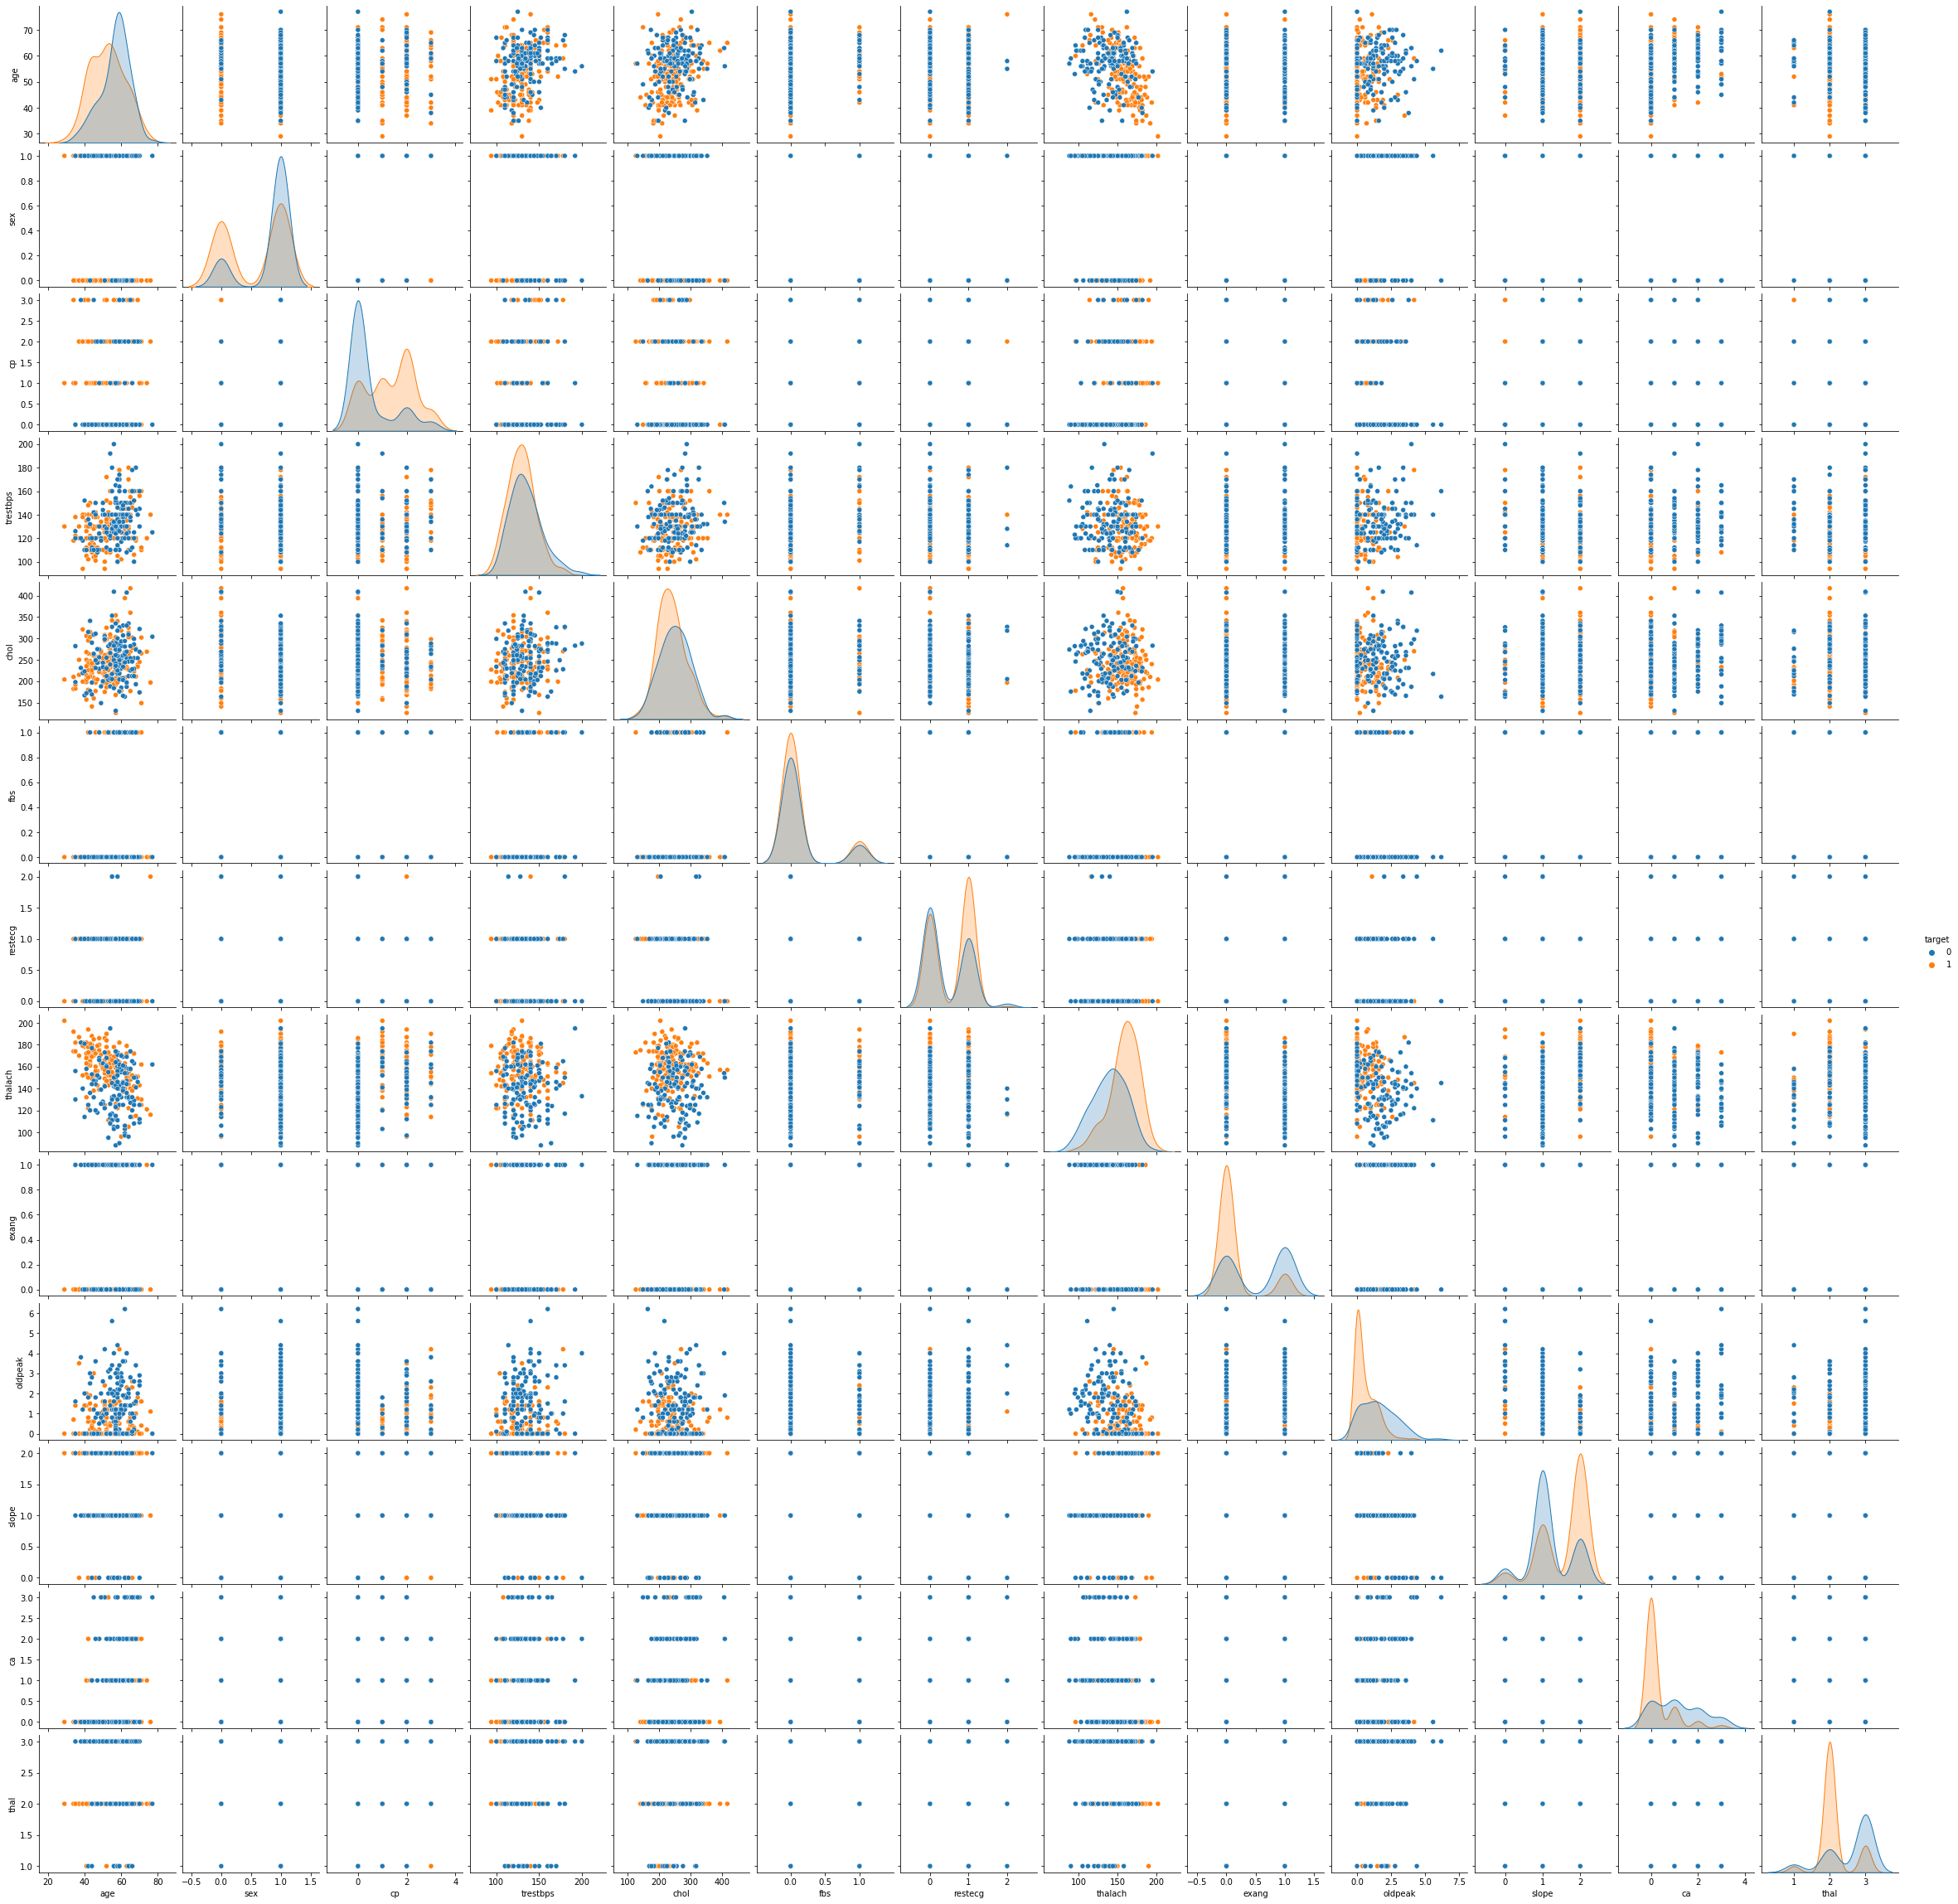

In [31]:
sns.pairplot(df, hue = "target")

## Train | Test Split and Scaling

In [32]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

In [36]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [37]:
def eval_metric1(model, X,y):
    y_pred = model.predict(X)
    
    print("MSE")
    print(mean_squared_error(y, y_pred))
    print("R2-Score")
    print(r2_score(y, y_pred))
    print()

# Implement Logistic Regression and Evaluate

In [38]:
log_model=LogisticRegression()

In [39]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
y_pred=log_model.predict(X_test_scaled)

In [41]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [42]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
194,60,1,2,140,185,0,0,155,0,3.000,1,0,2,0,1,0.801
110,64,0,0,180,325,0,1,154,1,0.000,2,0,2,1,1,0.623
87,46,1,1,101,197,1,1,156,0,0.000,2,0,3,1,1,0.912
98,43,1,2,130,315,0,1,162,0,1.900,2,1,2,1,1,0.509
217,63,1,0,130,330,1,0,132,1,1.800,2,3,3,0,0,0.002
274,47,1,0,110,275,0,0,118,1,1.000,1,1,2,0,0,0.025
239,35,1,0,126,282,0,0,156,1,0.000,2,0,3,0,0,0.137
284,61,1,0,140,207,0,0,138,1,1.900,2,1,3,0,0,0.033
265,66,1,0,112,212,0,0,132,1,0.100,2,1,2,0,0,0.189
34,51,1,3,125,213,0,0,125,1,1.400,2,1,2,1,0,0.331


In [43]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[22  5]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.84      0.81      0.83        32

    accuracy                           0.81        59
   macro avg       0.81      0.81      0.81        59
weighted avg       0.81      0.81      0.81        59


Train_Set
[[ 87  21]
 [ 10 117]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       108
           1       0.85      0.92      0.88       127

    accuracy                           0.87       235
   macro avg       0.87      0.86      0.87       235
weighted avg       0.87      0.87      0.87       235



In [44]:
eval_metric1(log_model, X_scaled, y)

MSE
0.14285714285714285
R2-Score
0.4247379454926625



In [53]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.846
test_precision_weighted   0.858
test_recall_weighted      0.846
test_f1_weighted          0.844
dtype: float64

# Implement KNN and Evaluate

In [45]:
knn_model=KNeighborsClassifier(n_neighbors=10)

In [46]:
y_pred=cross_val_predict(knn_model, X_scaled, y, cv=5)

In [47]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[21  6]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.82      0.88      0.85        32

    accuracy                           0.83        59
   macro avg       0.83      0.83      0.83        59
weighted avg       0.83      0.83      0.83        59


Train_Set
[[ 88  20]
 [ 13 114]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       108
           1       0.85      0.90      0.87       127

    accuracy                           0.86       235
   macro avg       0.86      0.86      0.86       235
weighted avg       0.86      0.86      0.86       235



In [49]:
error = []
for k in range(1,51):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    y_pred=cross_val_predict(knn_model, X_scaled, y, cv=5)
    error.append(mean_squared_error(y, y_pred))

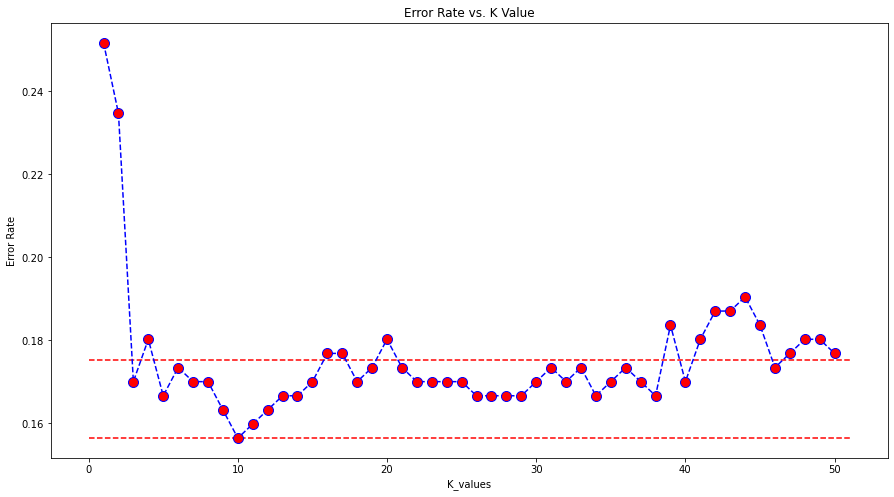

In [50]:
plt.figure(figsize=(15,8))
plt.plot(range(1,51), error, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=min(error), xmin = 0, xmax =51, colors= 'r', linestyles="--")
plt.hlines(y=sum(error)/len(error), xmin = 0, xmax =51, colors= 'r', linestyles="--")

- As we see the elbow here, it can be chosen as 10 for our n_neighbors value

# Visually compare models based on your chosen metric

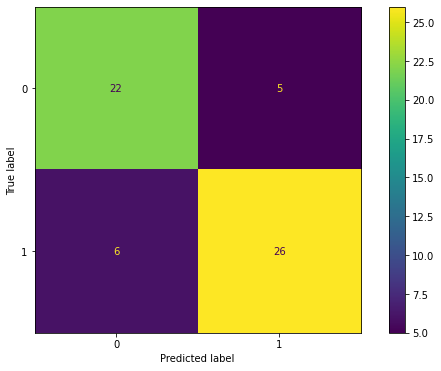

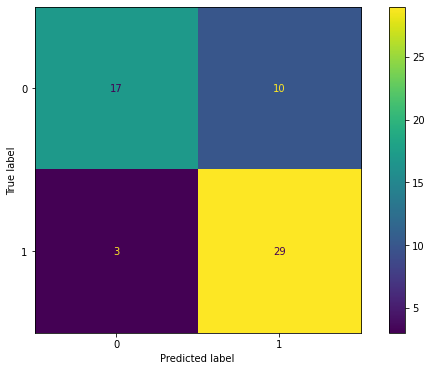

In [52]:
knn_model.fit(X_train_scaled, y_train)
plot_confusion_matrix(log_model, X_test_scaled, y_test);
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

# Chose best model and make a random prediction 

In [ ]:
import pickle

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

In [ ]:
pickle.dump(scaler, open("scaler_heart", 'wb'))

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
final_model = LogisticRegression().fit(X_scaled, y)

In [ ]:
pickle.dump(final_model, open("final_model_heart", 'wb'))

In [ ]:
my_dict = {"age": [28, 51, 36],
           "sex": [0, 1, 1],
           "cp": [1, 2, 1],
           "trestbps": [117, 98, 135],
           "chol": [230, 208, 284],
           "fbs": [0, 0, 1],
           "restecg": [1, 1, 0],
           "thalach": [185, 128, 146],
           "exang": [0, 1, 1],
           "oldpeak": [1.400, 2.500, 0.800],
           "slope": [2, 2, 1],
           "ca": [0.2, 1.3, 2.3],
           "thal": [0.2, 1.3, 2.3]
          }

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [ ]:
sample = pd.DataFrame(my_dict)
sample

In [ ]:
scaler_heart = pickle.load(open("scaler_heart", "rb"))

In [ ]:
sample_scaled = scaler_heart.transform(sample)
sample_scaled

In [ ]:
final_model = pickle.load(open("final_model_heart", "rb"))

In [ ]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [ ]:
sample["pred"] = predictions
sample["pred_proba_0"] = predictions_proba[:,0]
sample["pred_proba_1"] = predictions_proba[:,1]
sample